### Interpolación con método de diferencias divididas de Newton

Polinomio simplificado
 51.4424871871903*x**4 - 414637.972627049*x**3 + 1253277858.6996*x**2 - 1683616047977.19*x + 848144649769592.0
Valor X: 2013.5  Valor estimado en y: 5503.50000000000


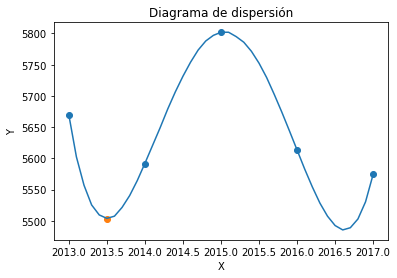

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
from sympy.abc import x
import numpy as np


class Interpolation():

  def newtonInterpolation(self,xi,fi):
    #Tabla
    n = len(xi)
    ki = np.arange(0,n,1)
    tabla = np.concatenate(([ki],[xi],[fi]),axis=0)
    tabla = np.transpose(tabla)

    #Tabla para diferencias divididas
    tabDiferencias = np.zeros(shape=(n,n),dtype=float)
    tabla = np.concatenate((tabla,tabDiferencias), axis=1)

    #Llenado de tabla
    [n,m] = np.shape(tabla)
    diagonal = n-1

    for j in range(3,m):
      paso=j-2 #Inicia en 1
      for i in range(0,diagonal):
        tabla[i,j] = (tabla[i+1,j-1]-tabla[i,j-1])/(xi[i+paso]-xi[i])
      diagonal = diagonal-1

    #Creación de polinomio
    dDividida = tabla[0,3:]
    n = len(tabDiferencias)
    polinomio = fi[0]
    for j in range(0,n-1):
        factor = dDividida[j]
        termino = 1
        for k in range(0,j+1):
            termino = termino*(x-xi[k])
        polinomio = polinomio + termino*factor
    polisimple = polinomio.expand()

    print("Polinomio simplificado\n",polisimple)
    return polisimple

class Graph():
  
  # Genera un gráfico de dispersión
  def plotScatter(self, X, Y):
    plt.scatter(X, Y)
    plt.title("Diagrama de dispersión")
    plt.xlabel("X")
    plt.ylabel("Y")
  
  # Genera un gráfico de línea
  def plotLine(self, func,a ,b):
    if (a>b):
      X = np.arange(a,b+0.01,-0.1)
    else:
      X = np.arange(a,b+0.01,0.1)
    Y = np.zeros_like(X)

    for i in range(len(X)):
        Y[i] = func.subs(x, X[i])
    
    plt.plot(X,Y)

  
  # Despliega el gráfico 
  def displayPlot(self):
    plt.show()

class Test():

  #Regresa dos arreglos con valores aleatorios
  def valuesRandomInt(self,minX,maxX,minRandom,maxRandom):
    #Entradas:minimo valor de X, máximo valor de X
    #         intervalo mínimo y máximo de valores aleatorios
    X=np.arange(minX,maxX+1,1)
    Y=np.zeros_like(X)

    for i in range(len(Y)):
      Y[i]=np.random.randint(minRandom,maxRandom+1)

    return X,Y


def main():

  df=pd.read_csv("https://raw.githubusercontent.com/brunolopez941/PracticasComputacionII/main/deaths-and-new-cases-of-hiv.csv")
  df1=df[["Entity","Year","Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)"]]
  
  dfNuevo=df1[3668:3696]
  dfNuevo.columns=["País","Año","MuertesPorAño"]
  dfNuevo=dfNuevo.tail(5)

  xi=dfNuevo.Año.to_numpy()
  fi=dfNuevo.MuertesPorAño.to_numpy()
  

  #objT=Test()
  #xi,fi=objT.valuesRandomInt(0,10,0,20)
  

  objInt=Interpolation()
  polinomio = objInt.newtonInterpolation(xi,fi)

  objG=Graph()
  objG.plotScatter(xi,fi)
  objG.plotLine(polinomio,xi[0],xi[-1])
  
  #Predicción de valor
  x1 = 2013.5
  y1 = polinomio.subs(x, x1) 
 
  print("Valor X:", x1, " Valor estimado en y:", y1)
  objG.plotScatter(x1, y1)


if __name__ == "__main__":
    main()

In [3]:
import pandas as pd

df=pd.read_csv("https://raw.githubusercontent.com/brunolopez941/PracticasComputacionII/main/deaths-and-new-cases-of-hiv.csv")
df

,Entity,Code,Year,Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number),Incidence - HIV/AIDS - Sex: Both - Age: All Ages (Number),Prevalence - HIV/AIDS - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,1990,32.098129,78.304642,39.825778
1,Afghanistan,AFG,1991,37.524158,83.233703,43.801984
2,Afghanistan,AFG,1992,50.670559,104.710195,54.325016
3,Afghanistan,AFG,1993,58.433049,128.605343,66.886983
4,Afghanistan,AFG,1994,65.531176,136.848748,73.556533
...,...,...,...,...,...,...
6463,Zimbabwe,ZWE,2013,31808.820281,43976.732223,120148.523852
6464,Zimbabwe,ZWE,2014,24602.870777,44922.981329,121027.388255
6465,Zimbabwe,ZWE,2015,20841.883197,47088.617994,122889.195041
6466,Zimbabwe,ZWE,2016,18491.624779,50759.227259,125763.368507
